In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
temp_df = pd.read_csv("C:/Users/FAIZA/Downloads/archive/IMDB Dataset.csv")
df = temp_df.iloc[:30000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(30000, 2)

In [7]:
df.describe()

,review,sentiment
count,30000,30000
unique,29854,2
top,Loved today's show!!! It was a variety and not...,positive
freq,4,15015


In [8]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
df['sentiment'].value_counts()

positive    15015
negative    14985
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

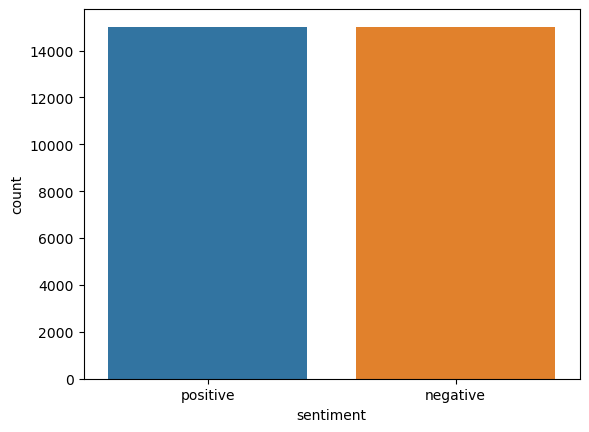

In [10]:
sns.countplot(x='sentiment',data=df)

In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
df.duplicated().sum()

146

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   14875  14875  Basically there's a family where a little boy ...   
positive   14979  14979  One of the other reviewers has mentioned that ...   

                
          freq  
sentiment       
negative     1  
positive     1

In [15]:
df['review_length'] = df['review'].apply(len)

In [16]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


Text(0, 0.5, 'frequency')

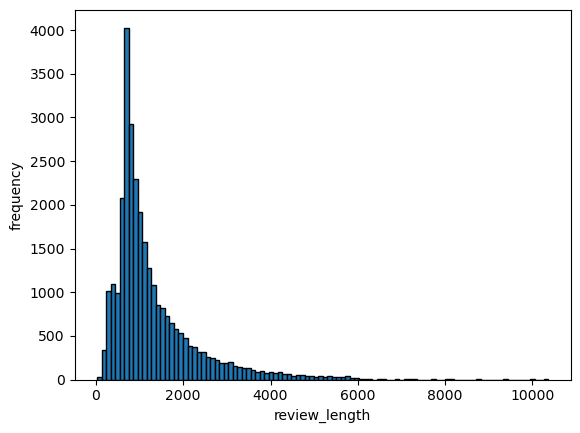

In [17]:
plt.hist(x='review_length',data=df,edgecolor = "black", bins = 100)
plt.xlabel('review_length')
plt.ylabel('frequency')

In [18]:
df = df.drop(columns=['review_length'])

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
# Initialize the stemmer
stemmer = PorterStemmer()
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers (retain only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in tokens]
    # Join the words back into a single string
    return ' '.join(stemmed_words)

# Apply preprocessing to the 'review' column
df['Cleaned_Review'] = df['review'].apply(preprocess_text)

# Check the processed data
df.head()

,review,sentiment,Cleaned_Review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [20]:
df = df.drop(columns=['review'])

In [21]:
df.head()

,sentiment,Cleaned_Review
0,positive,one review mention watch oz episod youll hook ...
1,positive,wonder littl product film techniqu unassum old...
2,positive,thought wonder way spend time hot summer weeke...
3,negative,basic there famili littl boy jake think there ...
4,positive,petter mattei love time money visual stun film...


In [22]:
df = df[['Cleaned_Review', 'sentiment'] + [col for col in df.columns if col not in ['Cleaned_Review', 'sentiment']]]

In [23]:
df.head()

,Cleaned_Review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [24]:
# split input and target feature
X = df.iloc[:,0:1]
y = df['sentiment']

In [25]:
X

,Cleaned_Review
0,one review mention watch oz episod youll hook ...
1,wonder littl product film techniqu unassum old...
2,thought wonder way spend time hot summer weeke...
3,basic there famili littl boy jake think there ...
4,petter mattei love time money visual stun film...
...,...
29995,new york love final make shore short stori lov...
29996,movi make wish imdb would let vote zero one tw...
29997,space camp unfortun luck plan around time chal...
29998,octavio paz mexican poet writer diplomat recei...


In [26]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
29995    positive
29996    negative
29997    negative
29998    positive
29999    negative
Name: sentiment, Length: 29854, dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
# label encode the sentiment data
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [28]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape

(23883, 1)

In [30]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['Cleaned_Review']).toarray()
X_test_bow = cv.transform(X_test['Cleaned_Review']).toarray()

X_train_bow.shape

(23883, 107080)

In [31]:
from scipy.sparse import csr_matrix

X_train_bow = csr_matrix(X_train_bow)  # Convert to sparse representation


In [32]:
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB()  # Works better for text data
gnb.fit(X_train_bow, y_train)


MultinomialNB()

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

k = 5000  # Keep only top 5000 features
selector = SelectKBest(chi2, k=k)
X_train_bow_reduced = selector.fit_transform(X_train_bow, y_train)

gnb.fit(X_train_bow_reduced, y_train)


MultinomialNB()

In [37]:
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB()
gnb.fit(X_train_bow, y_train)  # Train directly on sparse matrix


MultinomialNB()

In [38]:
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8537933344498408

In [39]:
confusion_matrix(y_test,y_pred)

array([[2620,  374],
       [ 499, 2478]], dtype=int64)

In [40]:
#forestclassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8460894322559035

In [41]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['Cleaned_Review']).toarray()
X_test_bow = cv.transform(X_test['Cleaned_Review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.84123262435103

In [42]:
#n-gram
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

X_train_bow = cv.fit_transform(X_train['Cleaned_Review']).toarray()
X_test_bow = cv.transform(X_test['Cleaned_Review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8410651482163791

In [43]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train['Cleaned_Review']).toarray()
X_test_tfidf = tfidf.transform(X_test['Cleaned_Review'])

In [45]:
#word2vec
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
story = []
for doc in df['Cleaned_Review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [46]:
model.build_vocab(story)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(16349628, 17664505)

In [47]:
len(model.wv.index_to_key)

43381

In [ ]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

document_vector(df['Cleaned_Review'].values[0])

array([ 1.53289765e-01,  3.13777059e-01, -1.50471805e-02, -2.81694941e-02,
       -2.41263166e-01, -3.41855049e-01,  2.31566638e-01,  3.11675876e-01,
       -2.62348294e-01, -2.51146883e-01,  3.14621449e-01, -8.17520797e-01,
        2.01086521e-01, -3.50347698e-01,  1.02377407e-01, -3.59866500e-01,
        3.36716294e-01, -3.25101495e-01,  9.11977813e-02, -3.39099050e-01,
       -5.29538617e-02,  3.50103408e-01,  2.64222205e-01, -5.35322011e-01,
       -5.15774250e-01,  3.47390682e-01, -1.95846751e-01, -5.57638407e-01,
       -1.80932105e-01, -2.19751015e-01,  1.45791881e-02, -4.92854789e-02,
       -3.92350815e-02, -3.60240012e-01, -4.27837223e-01,  5.68534732e-01,
        4.61748093e-02,  1.18036479e-01, -4.36680377e-01, -3.90759468e-01,
        3.92470688e-01, -4.28495437e-01, -1.24695137e-01,  3.31358314e-02,
        3.09977889e-01, -4.39028323e-01, -1.94254100e-01, -8.20737779e-01,
        2.13158727e-01, -1.53555378e-01, -6.25286018e-03, -2.59887457e-01,
        4.27344203e-01, -

In [49]:
from tqdm import tqdm
X = []
for doc in tqdm(df['Cleaned_Review'].values):
    X.append(document_vector(doc))

100%|██████████| 29854/29854 [16:31<00:00, 30.12it/s]


In [50]:
X = np.array(X)
X[0]

array([ 1.53289765e-01,  3.13777059e-01, -1.50471805e-02, -2.81694941e-02,
       -2.41263166e-01, -3.41855049e-01,  2.31566638e-01,  3.11675876e-01,
       -2.62348294e-01, -2.51146883e-01,  3.14621449e-01, -8.17520797e-01,
        2.01086521e-01, -3.50347698e-01,  1.02377407e-01, -3.59866500e-01,
        3.36716294e-01, -3.25101495e-01,  9.11977813e-02, -3.39099050e-01,
       -5.29538617e-02,  3.50103408e-01,  2.64222205e-01, -5.35322011e-01,
       -5.15774250e-01,  3.47390682e-01, -1.95846751e-01, -5.57638407e-01,
       -1.80932105e-01, -2.19751015e-01,  1.45791881e-02, -4.92854789e-02,
       -3.92350815e-02, -3.60240012e-01, -4.27837223e-01,  5.68534732e-01,
        4.61748093e-02,  1.18036479e-01, -4.36680377e-01, -3.90759468e-01,
        3.92470688e-01, -4.28495437e-01, -1.24695137e-01,  3.31358314e-02,
        3.09977889e-01, -4.39028323e-01, -1.94254100e-01, -8.20737779e-01,
        2.13158727e-01, -1.53555378e-01, -6.25286018e-03, -2.59887457e-01,
        4.27344203e-01, -

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])
y

array([1, 1, 1, ..., 0, 1, 0])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8333612460224418